# Gas Consumption Analyzer Presentation

System pipeline:
 1. Get rid of unnecessary letters and digits.
 2. Extract digits using an OCR library (PyTesseract) into a CSV.
 3. Analyze the CSV.

In [1]:
from pathlib import Path
from services.constants import CSV_DIRNAME, FIGURES_DIRNAME
from services.data_analyzer import DataAnalyzer
from services.digit_extractor_morphology import DigitExtractorMorphology
from services.digit_extractor_registration import DigitExtractorRegistration

%matplotlib inline

DATASET_PATH = Path("dataset/gasmeter")
TMP_PATH = Path("tmp")
SHOW = True

## Morphology Approach

Leverages the fact that the digits lie on a different background than the rest of the text.

1


/home/atti/source/gas-consumption/src/backend/services/digit_extractor_morphology.py:75: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


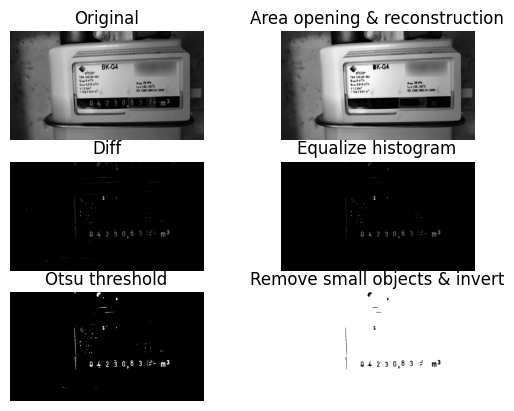

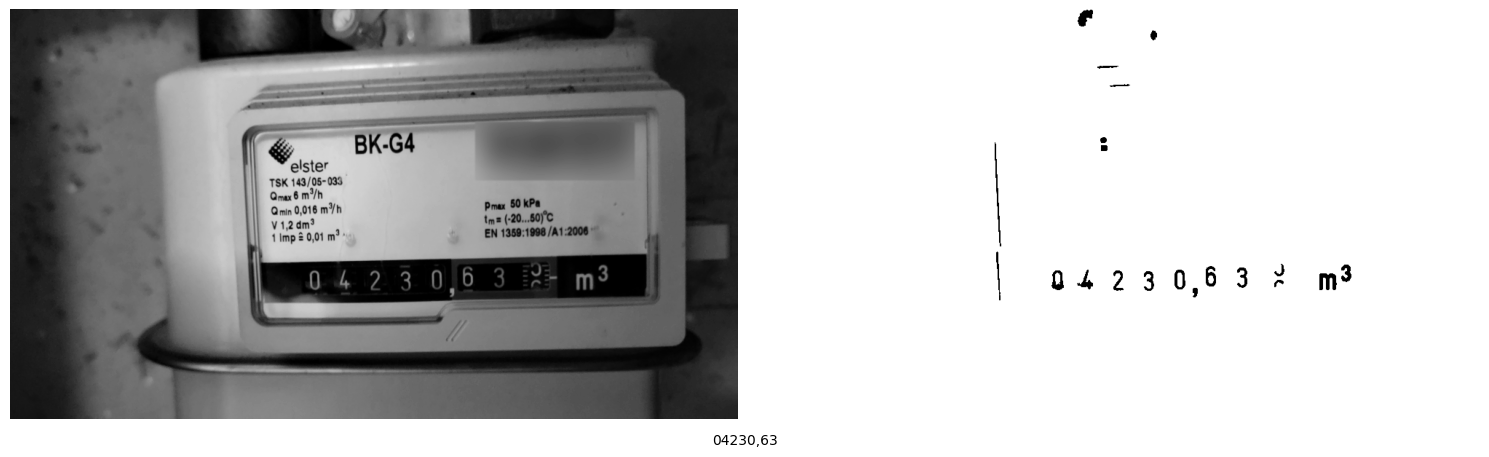

04230,63


In [2]:
de = DigitExtractorMorphology(DATASET_PATH, TMP_PATH / CSV_DIRNAME)
de.process_dataset(show=SHOW, img_idx=1)

In [3]:
# de.process_dataset(show=False)

Original size: 84, NaN count: 7, Outlier count: 23


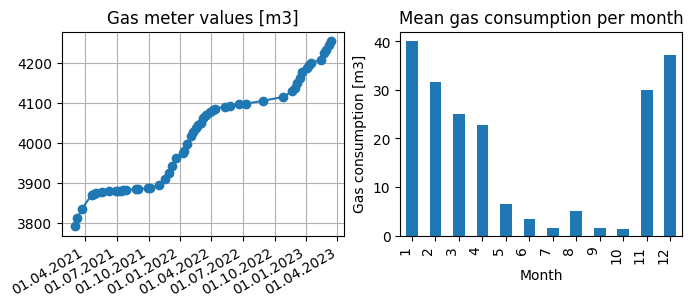

In [4]:
from services.data_analyzer import DataAnalyzer
da = DataAnalyzer(TMP_PATH / CSV_DIRNAME, TMP_PATH / FIGURES_DIRNAME, lof_n_neighbors=20, lof_contamination=0.3)
da.analyze(SHOW)

### Discussion

 - Achieves around 65% accuracy on the given dataset.
 - **Dataset overfitting and missing scale invariance** due to the hardcoded constants in [DigitExtractorMorhpology](./services/digit_extractor_morphology.py) and [DataAnalyzer](./services/data_analyzer.py). If the gasmeter is shot from a different distance (i.e., the digits cover a different number of pixels), the algorithm fails.
   - <img src="../../assets/img_w_2500.png" width="50%">
   - When using image width 2500px instead of 1000px, the algorithm fails.

## Image Registration Approach

The aim is to align all images to be able to precisely crop out the region of interest.

1


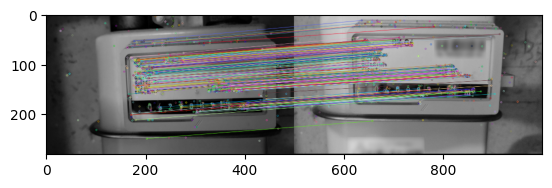

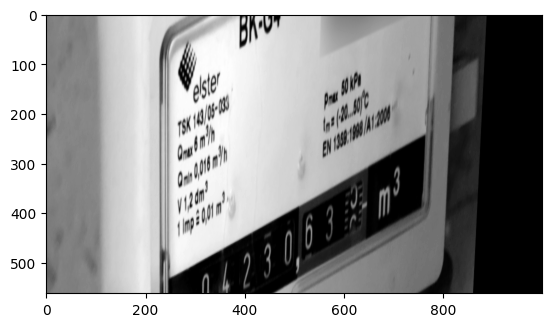

'NoneType' object has no attribute 'groups'


In [5]:
de = DigitExtractorRegistration(DATASET_PATH, TMP_PATH / CSV_DIRNAME)
de.process_dataset(show=SHOW, img_idx=1)

### Discussion

 - Unsuccessful.
 - The image lacks enough characteristic feature points for the SIFT or ORB detector.

## Other approaches worth exploring

**Train an object detector for finding a bounding box around the gasmeter label and apply the OCR to this ROI.**

<img src="../../assets/bb.png" width="50%">

  - Pros:
    - Scale invariance
    - More robust to lighting conditions
    - Discards distracting elements from the background
    - Speed (especially when using single shot object detectors, like YOLO)
  - Cons:
    - Need for data annotation, which can be time-consuming (but maybe worth it).